###Importamos las librerias que nos seran utiles

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

#Importamos los datos

In [173]:
sharks = pd.read_csv('/home/julian/Cursos/Ironhack/Proyecto1/shark-data-cleaning/attacks.csv', encoding="ISO-8859-1")

In [174]:
sdf = pd.DataFrame(sharks)

##Como podemos observar, la mayoria de los datos son no numericos.

In [175]:
sdf.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

### LIMPIEZA HIPOTESIS I

##Vamos a eliminar las columnas que no son relevantes para el analisis de la primer hipotesis

In [176]:
def drop():
    relevant = ['Case Number', 'Type', 'Case Number.1', 'Case Number.2']
    for i in sdf.columns:
        if i not in relevant:
            sdf.drop(columns=[i], inplace=True)

In [177]:
drop()

#Las columnas 'Case Number', 'Case Number.1' y 'Case Number.2' son relevantes para el analisis, sin embargo, vamos a chequear en que medida los valores de las columnas se parecen para prescindir de alguna de las tres ##DEFINIR FUNCION

In [178]:
"""
def compare(): 
        compare1 = np.where(sdf['Case Number'] == sdf['Case Number.1'], True, False)
        sdf['equal1'] = compare1
        compare2 = np.where(sdf['Case Number'] == sdf['Case Number.2'], True, False)
        sdf['equal2'] = compare2
        compare3 = np.where(sdf['Case Number'] == sdf['Case Number.2'], True, False)
        sdf['equal3'] = compare3
        return print(sdf['equal1'].value_counts()); print(sdf['equal2'].value_counts()); print(sdf['equal3'].value_counts())
"""
            

"\ndef compare(): \n        compare1 = np.where(sdf['Case Number'] == sdf['Case Number.1'], True, False)\n        sdf['equal1'] = compare1\n        compare2 = np.where(sdf['Case Number'] == sdf['Case Number.2'], True, False)\n        sdf['equal2'] = compare2\n        compare3 = np.where(sdf['Case Number'] == sdf['Case Number.2'], True, False)\n        sdf['equal3'] = compare3\n        return print(sdf['equal1'].value_counts()); print(sdf['equal2'].value_counts()); print(sdf['equal3'].value_counts())\n"

In [179]:
compare = np.where(sdf['Case Number.1'] == sdf['Case Number.2'], True, False)

In [180]:
sdf['equal'] = compare

In [181]:
sdf['equal'].value_counts() 

False    19441
True      6282
Name: equal, dtype: int64

In [182]:
sdf.isnull().sum()

Case Number      17021
Type             19425
Case Number.1    19421
Case Number.2    19421
equal                0
dtype: int64

##SI COMPARAMOS LAS TRES COL ENTRE SI, EN DONDE MENOS DIF DE VAL HAY ES ENTRE CAS NBR Y CAS NBR.2, AUNQUE LA DI ES MINIMA. SIN EMBARGO DE LAS TRES COL LA QUE MENOS CANT DE NULL TIENE ES CASE NBR, NOS QUEDAMOS CON ELLA##DEJAMOS SOLO LAS COLUMNAS CASE NR Y TYPE

In [183]:
sdf.drop(columns=['Case Number.1', 'Case Number.2', 'equal'], inplace=True)

##VAMOS A ELIMINAR LOS VALORES QUE NO SEAN FECHA, YA QUE NOS INTERESA VER LA ESTACIONALIDAD. Empezamos por los valores NaN, y luego añadiremos una columna solo con los valores que contengan informacion sobre el mes, ya que nos interesa solo la indfo mensual

In [184]:
sdf.dropna(inplace=True)

In [185]:
def filtracion(x):
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    m = re.findall('\d{4}.\d{2}.\d{2}', x)
    if m and m[0][5:7] != '00':
        for k, v in months.items():
            if k == m[0][5:7]:
                return v

In [186]:
sdf['Months'] = sdf['Case Number'].apply(filtracion)

##Borramos los valores nulos para los datos que no tenian registro mensual

In [187]:
sdf.dropna(inplace=True)

##exportamos el data frame a un csv para realizar las visualizaciones

In [188]:
sdf.to_csv('sdf',index=False)

##aHORA CONSTRUIMOS UN DATAFRAME CUYAS COLUMNAS CONTENDRAN LAS FRECUENCIAS MENSUALES DE ATAQUES Y LOS MESES CORRESPNDIENTES consideramos todos los tipos  de ataque.

In [189]:
ataques_mensuales = pd.DataFrame(sdf['Months'].value_counts()).reset_index()

##RENOMBRAMOS LAS COLUMNAS PARA EMPROLIJAR

In [190]:
c = {'Months': 'Monthly Attacks', 'index':'Month'}
ataques_mensuales = ataques_mensuales.rename(columns=c)

In [191]:
ataques_mensuales = ataques_mensuales.reindex([3, 11, 8, 5, 10, 4, 0, 1, 2, 7, 9, 6])

In [192]:
display(ataques_mensuales)

,Month,Monthly Attacks
3,Jan,520
11,Feb,382
8,Mar,409
5,Apr,457
10,May,391
4,Jun,499
0,Jul,668
1,Aug,599
2,Sep,552
7,Oct,441


##Exportamos el data frame de ataques mensuales para utilizarlo en las visualizaciones

In [193]:
ataques_mensuales.to_csv('ataques_mensuales',index=False)

### LIMPIEZA HIPOTESIS II

In [194]:
sdf2= pd.DataFrame(sharks)

### vamos a quedarnos solo con las columnas que nos interesan para analizar la H2, 'Species ' , 'Injury' y 'Fatal'

In [195]:
def drop2():
    """
    Por cada elemento perteneciente al index de columnas, si este no pertenece a la lista de columnas
    relevantes, lo elimina del data frame
    """
    relevant = ['Injury', 'Fatal (Y/N)', 'Species ']
    for i in sdf2.columns:
        if i not in relevant:
            sdf2.drop(columns=[i], inplace=True)

In [196]:
drop2()

### vamos a limpiar las col 'Injury' y 'Fatal'

##Si bien ambas columnas poseen datos sobre la letalidad, la columna 'Sepecies' es la que mas datos nulos posee. Comenzaremos limpiando esa columna

In [197]:
sdf2['Fatal (Y/N)'].isna().value_counts()

True     19960
False     5763
Name: Fatal (Y/N), dtype: int64

In [198]:
sdf2['Injury'].isna().value_counts()

True     19449
False     6274
Name: Injury, dtype: int64

In [199]:
sdf2['Species '].isna().value_counts()

True     22259
False     3464
Name: Species , dtype: int64

In [200]:
sdf2.dropna(inplace=True)

In [201]:
sdf2.shape

(2944, 3)

In [202]:
def filtracion_especies(x):
    m = re.findall('\w+. shark', x)
    if m:
        return (m[0].lower())

In [203]:
sdf2['Identified Specie'] = sdf2['Species '].apply(filtracion_especies)

In [204]:
sdf2.head()

,Injury,Fatal (Y/N),Species,Identified Specie
0,"No injury to occupant, outrigger canoe and pad...",N,White shark,white shark
3,Minor injury to lower leg,N,2 m shark,None
4,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m",tiger shark
6,FATAL,Y,Tiger shark,tiger shark
7,Minor injury to foot. PROVOKED INCIDENT,N,"Lemon shark, 3'",lemon shark


## Vamos a quedarnos con los valores en donde hay un 'Y' en Fatal, en la col letalidad

## Como la columna Fatal posee mas valores no nulos que Injury, potencialmente podemos obtener mas info sobre letalidad, vamos a prescindir de Injury.

In [205]:
sdf2.drop(columns=['Injury'], inplace=True)

In [206]:
letal = pd.DataFrame(sdf2[sdf2['Fatal (Y/N)'] == 'Y'])

In [207]:
letal.head()

,Fatal (Y/N),Species,Identified Specie
6,Y,Tiger shark,tiger shark
58,Y,"Tiger shark, female",tiger shark
59,Y,Some drowned but other may have been killed by...,blue shark
64,Y,Tiger shark,tiger shark
155,Y,White shark,white shark


In [208]:
letal2 = pd.DataFrame(letal['Identified Specie'].value_counts()).reset_index()

In [209]:
d = {'Identified Specie': 'Cantidad de Muertes', 'index':'Especie'}
letal2 = letal2.rename(columns=d)

In [210]:
letal2.head(15)

,Especie,Cantidad de Muertes
0,white shark,143
1,tiger shark,70
2,bull shark,37
3,zambesi shark,9
4,blue shark,7
5,whitetip shark,6
6,12' shark,5
7,whaler shark,5
8,16' shark,3
9,14' shark,3


## Como podemos ver, a partir de la septima fila, los registros son muy, bajos, vamos a recortar el data frame para quedarnos con las especies que mas registros tienen

In [211]:
letal2.drop(range(8, 41), axis=0, inplace=True)

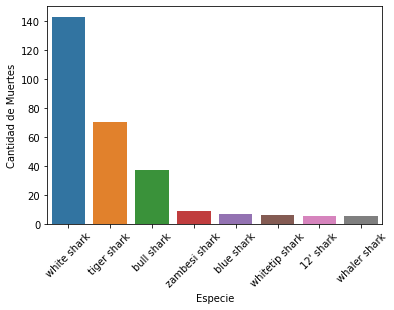

In [215]:
f = sns.barplot(x=letal2.Especie, y=letal2['Cantidad de Muertes'], data=letal2)
f.tick_params(axis='x', rotation=45);

In [ ]:
letal2['Especie'].value_counts().plot(kind="bar",
                                        figsize=(12,6),
                                        title="especie")
plt.xticks(rotation=45);